In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cPickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
class PerceptronLearner(object):

    def __init__(self, data, labels, c):
        self.W = np.random.rand(data.shape[1]+1)
        self.data = data
        self.labels = labels
        self.c = c

    def train(self):
        """
        :type features: ((m,n)) NumPy array.
        :type labels: ((n,1)) NumPy array.
        """
        output = lambda x: 0 if np.sign(x)<0 else 1
        self.norms = []
        self.accuracies = []

        # each epoch
        for epoch in xrange(100):
            ylist = []
            x = np.hstack((self.data, np.ones((self.data.shape[0], 1))))
            # each instance
            for i in xrange(x.shape[0]):
                y = output(np.dot(self.W, x[i]))
                error = self.labels[i] - y
                ylist.append(0 if error[0]!=0 else 1)
                self.W += self.c * error[0] * x[i]
            self.norms.append(np.log(np.linalg.norm(self.W, 2)))
            self.accuracies.append(np.sum(ylist)/float(len(ylist)))

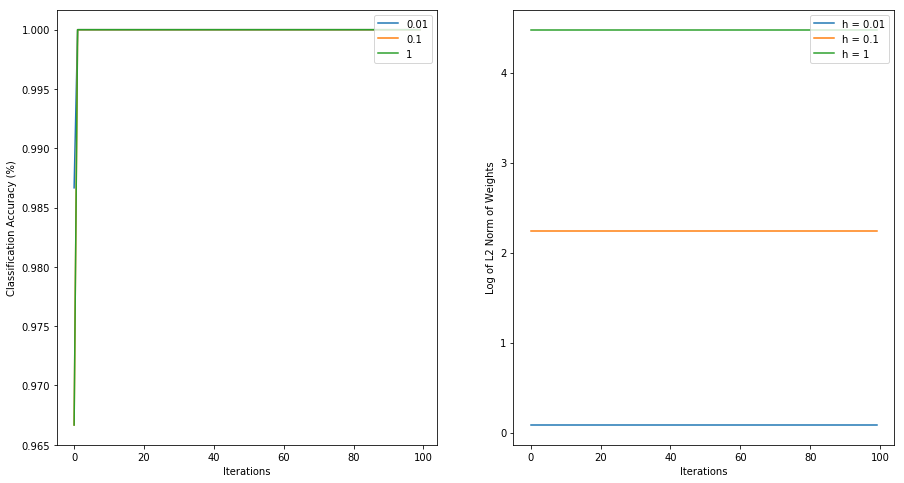

In [4]:
data = pd.read_csv("data/iris.csv")
M = data.as_matrix()
labels = M[:,0]
labels[labels==2] = 1
labels = np.atleast_2d(labels).T
features = M[:,1:5]

for c in [0.01, 0.1, 1]:
    P = PerceptronLearner(features, labels, c)
    P.train()
    plt.subplot(121)
    plt.plot(np.arange(100), P.accuracies, label=c)
    plt.legend(loc="upper right")
    plt.ylabel("Classification Accuracy (%)")
    plt.xlabel("Iterations")
    plt.subplot(122)
    plt.plot(np.arange(100), P.norms, label="h = {}".format(c))
    plt.legend(loc="upper right")
    plt.ylabel("Log of L2 Norm of Weights")
    plt.xlabel("Iterations")
plt.show()

In [5]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'data/cifar-10-batches-py/data_batch_1' )
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

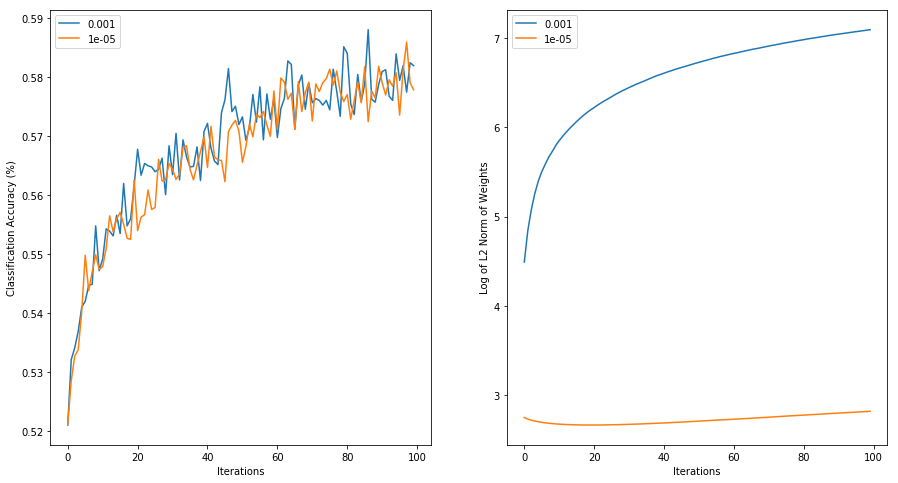

In [8]:
for c in [0.001, 0.00001]:
    P = PerceptronLearner(features, labels, c)
    P.train()
    plt.subplot(121)
    plt.plot(np.arange(100), P.accuracies, label=c)
    plt.legend(loc="upper left")
    plt.ylabel("Classification Accuracy (%)")
    plt.xlabel("Iterations")
    plt.subplot(122)
    plt.plot(np.arange(100), P.norms, label=c)
    plt.legend(loc="upper left")
    plt.ylabel("Log of L2 Norm of Weights")
    plt.xlabel("Iterations")
plt.show()